In [217]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace, minimum_filter
from scipy.signal import argrelextrema
from scipy.ndimage import gaussian_laplace
from scipy.ndimage import label
from scipy.ndimage.measurements import center_of_mass

/var/folders/z5/b9yhk9k12l31fz69p714mhyw0000gn/T/ipykernel_83830/2074547409.py:8: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import center_of_mass


In [218]:
BLUE = 0
GREEN = 1
RED = 2

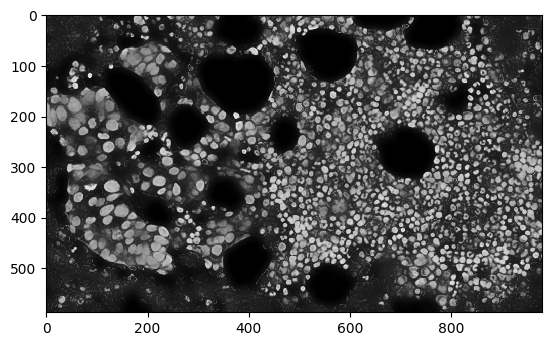

In [219]:
tumor = '../images/metastatic-breast-cancer.jpg'
tumor = cv2.imread(tumor, cv2.IMREAD_UNCHANGED)
tumor_r = cv2.split(tumor.copy())[RED]
tumor_r = cv2.bilateralFilter(tumor_r, 30, 55, 55)
tumor_r = cv2.bitwise_not(tumor_r)
plt.imshow(tumor_r, interpolation='nearest', cmap='gray')  # for grayscale images
plt.show()

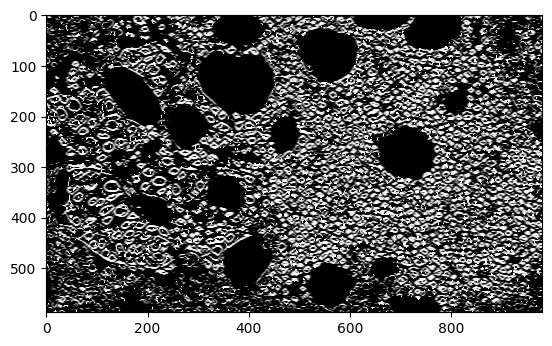

In [220]:
# Define the standard deviation of the Gaussian filter
sigma = 1.5
radius = sigma * np.sqrt(2)


# Apply the LoG filter to the image
tumor_r = (sigma**2)*gaussian_laplace(tumor_r, sigma=sigma)
plt.imshow(tumor_r, interpolation='nearest', cmap='gray')  # for grayscale images
plt.show()

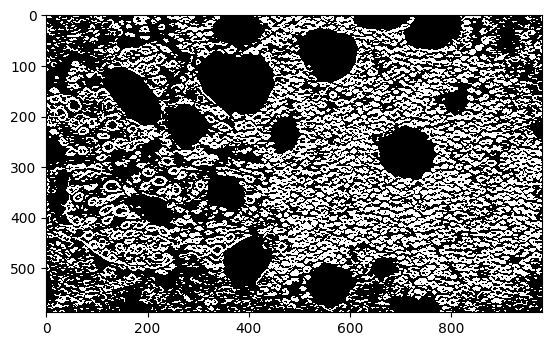

In [221]:
tumor_r = cv2.convertScaleAbs(tumor_r)
_, tumor_r = cv2.threshold(tumor_r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(tumor_r, interpolation='nearest', cmap='gray')  # for grayscale images
plt.show()